# ABOUT DATA MINING (using headings one level )

##### (using paragraph)
Data mining is the process of discovering patterns, correlations, trends, and useful information from large sets of data, using a combination of statistical analysis, machine learning, and database systems. 
The goal of data mining is to extract knowledge from a data set and transform it into an understandable structure for further use. (using paragraph)

##### (using bullets)
##### Here are key points to understand about data mining:
* Pattern Discovery
* Predictive Analysis
* Large Datasets
* Diverse Applications
* Techniques and Tools
* Ethical Considerations

#### (using bold)
**Pattern Discovery**: It involves identifying unusual patterns or anomalies and consistent patterns in data. For example, finding frequent buying patterns in supermarket transaction data.

**Predictive Analysis**: Data mining can be used to construct models that predict future trends or behaviors. 

**Large Datasets**: Data mining is particularly useful for dealing with large quantities of data (Big Data), where manual analysis would be impractical or impossible.

**Diverse Applications**: It is used across a wide range of industries, such as finance for credit scoring and fraud detection, marketing for customer segmentation, retail for inventory management, and in healthcare for predicting patient outcomes.

**Techniques and Tools**: Data mining employs a variety of techniques including clustering (finding groups of similar items), classification (assigning items to predefined categories), regression (predicting a continuous value), and association rule learning (discovering relationships between variables).

**Ethical Considerations**: With its ability to uncover patterns and personal information, data mining raises privacy and ethical concerns. It's important to use data mining techniques responsibly and in compliance with privacy laws and ethical standards.

# CONCLUSION

#### (using italics)
*In summary, data mining is a powerful tool that allows organizations to make informed decisions by identifying trends, patterns, and relationships in data that might not be immediately apparent. Its applications are vast and can provide significant competitive advantages and insights for businesses and researchers*.

In [1]:
import requests

def get_data_from_url(url, token):
    # Set up the headers with the web token for authentication
    headers = {
        'Token': f'{token}',
        'Email': 'RYadannavar4686@muleriders.saumag.edu'

    }

    # Make the HTTP GET request to the URL
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Process the data (assuming it's JSON)
        data = response.json()
        return data
    else:
        # Handle errors (e.g., print an error message)
        print(f'Failed to fetch data: {response.status_code}')
        return None

# Example usage
url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/datasets/'  # Replace with the actual URL
token = 'SewXCENnyBLmAxmyRLWgIvmDiuxbmHbh'         # Replace with your actual web token
data = get_data_from_url(url, token)

if data is not None:
    print(data)


{'metadata': {'resultset': {'offset': 1, 'count': 11, 'limit': 25}}, 'results': [{'uid': 'gov.noaa.ncdc:C00861', 'mindate': '1750-02-01', 'maxdate': '2024-01-28', 'name': 'Daily Summaries', 'datacoverage': 1, 'id': 'GHCND'}, {'uid': 'gov.noaa.ncdc:C00946', 'mindate': '1763-01-01', 'maxdate': '2024-01-01', 'name': 'Global Summary of the Month', 'datacoverage': 1, 'id': 'GSOM'}, {'uid': 'gov.noaa.ncdc:C00947', 'mindate': '1763-01-01', 'maxdate': '2024-01-01', 'name': 'Global Summary of the Year', 'datacoverage': 1, 'id': 'GSOY'}, {'uid': 'gov.noaa.ncdc:C00345', 'mindate': '1991-06-05', 'maxdate': '2024-01-29', 'name': 'Weather Radar (Level II)', 'datacoverage': 0.95, 'id': 'NEXRAD2'}, {'uid': 'gov.noaa.ncdc:C00708', 'mindate': '1994-05-20', 'maxdate': '2024-01-27', 'name': 'Weather Radar (Level III)', 'datacoverage': 0.95, 'id': 'NEXRAD3'}, {'uid': 'gov.noaa.ncdc:C00821', 'mindate': '2010-01-01', 'maxdate': '2010-01-01', 'name': 'Normals Annual/Seasonal', 'datacoverage': 1, 'id': 'NORMAL

In [28]:
#import requests
#import os
#import json
#from datetime import datetime, timedelta

# Function to fetch data from NOAA for a given range
#def fetch_noaa_data(start_date, end_date, token):
    #base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
    #params = {
        #'datasetid': 'GHCND',
        #'locationid': 'ZIP:80249',
        #'units': 'standard',
        #'startdate': start_date,
        #'enddate': end_date,
        #'limit': 1000
    #}
    #headers = {
        #'token': token
    #}

    #response = requests.get(base_url, headers=headers, params=params)
    #return response.json()

# Directory to save JSON files
#data_dir = 'data/'
#os.makedirs(data_dir, exist_ok=True)

# Your API token
#api_token = 'SewXCENnyBLmAxmyRLWgIvmDiuxbmHbh'

# Loop through the years 2008-2022
#for year in range(2008, 2023):
    # Construct the start and end dates for the API call
    #start_date = f'{year}-12-15'
    #end_date = f'{year+1}-01-21'
    
    # Fetch the data
    #data = fetch_noaa_data(start_date, end_date, api_token)
    
    # Save the data to a JSON file
    #file_path = os.path.join(data_dir, f'winter_{year}-{year+1}.json')
    #with open(file_path, 'w') as file:
        #json.dump(data, file, indent=4)

    #print(f'Data for {year} saved to {file_path}')


In [2]:
import pandas as pd
import os
import json

# Initialize a DataFrame to store the aggregated data
aggregated_data = pd.DataFrame()

# Directory containing the JSON files
data_dir = 'data/'

# Process each JSON file and calculate the TAVG
for file_name in os.listdir(data_dir):
    if file_name.startswith('winter_') and file_name.endswith('.json'):
        file_path = os.path.join(data_dir, file_name)
        
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Create a DataFrame from the current JSON file's data
            df = pd.DataFrame(data['results'])
            
            # Filter out records that don't have TMAX or TMIN as their datatype
            df_tmax = df[df['datatype'] == 'TMAX'].rename(columns={'value': 'TMAX'}).drop('datatype', axis=1)
            df_tmin = df[df['datatype'] == 'TMIN'].rename(columns={'value': 'TMIN'}).drop('datatype', axis=1)
            
            # Merge the TMAX and TMIN data on the date field
            df_merged = pd.merge(df_tmax, df_tmin, on='date')
            
            # Calculate TAVG
            df_merged['TAVG'] = (df_merged['TMAX'] + df_merged['TMIN']) / 2
            
            # Append the processed data to the aggregated DataFrame
            aggregated_data = pd.concat([aggregated_data, df_merged])

# Set the date as the index
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
aggregated_data.set_index('date', inplace=True)

# Sort by date
aggregated_data.sort_index(inplace=True)

# Select only the required columns
aggregated_data = aggregated_data[['TMAX', 'TMIN', 'TAVG']]

# Save to CSV
csv_file_path = os.path.join(data_dir, 'all_data_max_min_avg.csv')
aggregated_data.to_csv(csv_file_path)

print(f'CSV file saved to {csv_file_path}')


CSV file saved to data/all_data_max_min_avg.csv


In [3]:
import pandas as pd
import os
import json
from datetime import datetime

# Directory containing the JSON files
data_dir = 'data/'  # Modify this to your local data directory

# Initialize a DataFrame to store the compiled data
compiled_data = pd.DataFrame()

# Loop over each year and process the corresponding JSON file
for year in range(2008, 2023):
    year_range = f'{year}-{year+1}'
    json_file = f'winter_{year_range}.json'
    json_path = os.path.join(data_dir, json_file)

    if os.path.exists(json_path):
        with open(json_path, 'r') as file:
            data = json.load(file)['results']
            
            # Temporary storage for TMAX and TMIN values
            tmax_values = {}
            tmin_values = {}

            # Extract and process TAVG for each date
            for record in data:
                
                date_str = datetime.strptime(record['date'], '%Y-%m-%dT%H:%M:%S').strftime('%m-%d')
                if record['datatype'] == 'TMAX':
                    tmax_values[date_str] = record['value']
                elif record['datatype'] == 'TMIN':
                    tmin_values[date_str] = record['value']

            # Calculate TAVG for each date
            for date_str in tmax_values:
                if date_str in tmin_values:
                    tavg = (tmax_values[date_str] + tmin_values[date_str]) / 2
                    # print(tavg,date_str, year_range )
                    compiled_data.at[date_str, year_range] = tavg
            #print(compiled_data)
#Save the compiled data to a CSV file
csv_file_path = os.path.join(data_dir, 'all_data_min.csv')
compiled_data.to_csv(csv_file_path, index=True)

print(f"CSV file saved to {csv_file_path}")


CSV file saved to data/all_data_min.csv


In [4]:
airport_data=pd.read_csv('all_data_min.csv')

In [5]:
airport_data.head()

,Unnamed: 0,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
0,12-15,-8.5,37.5,38.5,30.0,36.0,NaN,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5,17.5
1,12-16,13.0,42.5,26.0,27.0,32.0,NaN,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0,15.0
2,12-17,25.5,38.5,24.5,29.0,36.5,NaN,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5,16.0
3,12-18,16.5,30.0,25.5,41.5,33.5,NaN,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5,26.5
4,12-19,29.0,32.5,38.0,29.5,15.5,NaN,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0,30.5


In [6]:
airport_data.isnull().sum()

Unnamed: 0     0
2008-2009      0
2009-2010      0
2010-2011      0
2011-2012      0
2012-2013      0
2013-2014     16
2014-2015      0
2015-2016      0
2016-2017      0
2017-2018      0
2018-2019      0
2019-2020      0
2020-2021      0
2021-2022      0
2022-2023      0
dtype: int64

In [7]:
denver_data=airport_data.drop('2013-2014', axis=1)

In [8]:
denver_data.head()

,Unnamed: 0,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
0,12-15,-8.5,37.5,38.5,30.0,36.0,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5,17.5
1,12-16,13.0,42.5,26.0,27.0,32.0,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0,15.0
2,12-17,25.5,38.5,24.5,29.0,36.5,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5,16.0
3,12-18,16.5,30.0,25.5,41.5,33.5,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5,26.5
4,12-19,29.0,32.5,38.0,29.5,15.5,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0,30.5


In [9]:
denver_data.tail()

,Unnamed: 0,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
33,01-17,40.5,41.5,47.5,15.5,34.5,44.5,25.0,31.5,33.0,43.0,37.0,38.0,43.0,29.5
34,01-18,46.5,40.5,39.0,30.0,44.0,50.0,36.5,36.5,46.5,32.0,28.5,30.5,41.0,22.0
35,01-19,48.5,34.5,26.5,46.5,41.0,44.5,33.0,38.0,51.0,35.0,28.5,30.5,24.0,20.0
36,01-20,48.5,29.0,22.5,43.0,30.5,34.5,37.0,35.5,37.5,44.0,35.0,40.5,27.5,19.5
37,01-21,56.0,31.5,34.5,48.0,36.5,23.0,30.5,30.5,25.5,40.0,41.0,37.5,26.0,21.0


In [10]:
denver_data.isnull().sum()

Unnamed: 0    0
2008-2009     0
2009-2010     0
2010-2011     0
2011-2012     0
2012-2013     0
2014-2015     0
2015-2016     0
2016-2017     0
2017-2018     0
2018-2019     0
2019-2020     0
2020-2021     0
2021-2022     0
2022-2023     0
dtype: int64

In [11]:
denver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  38 non-null     object 
 1   2008-2009   38 non-null     float64
 2   2009-2010   38 non-null     float64
 3   2010-2011   38 non-null     float64
 4   2011-2012   38 non-null     float64
 5   2012-2013   38 non-null     float64
 6   2014-2015   38 non-null     float64
 7   2015-2016   38 non-null     float64
 8   2016-2017   38 non-null     float64
 9   2017-2018   38 non-null     float64
 10  2018-2019   38 non-null     float64
 11  2019-2020   38 non-null     float64
 12  2020-2021   38 non-null     float64
 13  2021-2022   38 non-null     float64
 14  2022-2023   38 non-null     float64
dtypes: float64(14), object(1)
memory usage: 4.6+ KB


In [12]:
denver_data.rename(columns={'Unnamed: 0': 'Date'},inplace=True)

In [13]:
denver_data.head()

,Date,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
0,12-15,-8.5,37.5,38.5,30.0,36.0,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5,17.5
1,12-16,13.0,42.5,26.0,27.0,32.0,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0,15.0
2,12-17,25.5,38.5,24.5,29.0,36.5,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5,16.0
3,12-18,16.5,30.0,25.5,41.5,33.5,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5,26.5
4,12-19,29.0,32.5,38.0,29.5,15.5,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0,30.5


In [14]:
def average_warmest(df):
    max_data = df.drop(columns=['Date']).max()
    seasonal_max_avg = max_data.mean()
    return seasonal_max_avg

def average_coldest(df):
    min_data = df.drop(columns=['Date']).min()
    seasonal_min_avg = min_data.mean()
    return seasonal_min_avg
    
def average(df):
    avg_data = df.drop(columns=['Date']).mean().mean()
    return avg_data

avg_warmest = average_warmest(denver_data)
avg_coldest = average_coldest(denver_data)
avg_overall = average(denver_data)

print(f"Seasonal average of the warmest(maximum) temperatures: {avg_warmest}")
print(f"Seasonal average of the coldest temperatures(minimum): {avg_coldest}")
print(f"Overall average temperature(average): {avg_overall}")
      



Seasonal average of the warmest(maximum) temperatures: 48.5
Seasonal average of the coldest temperatures(minimum): 2.5
Overall average temperature(average): 30.29887218045113


In [15]:
#!pip uninstall numpy -y


In [16]:
#!pip install numpy


In [17]:
#!pip install matplotlib

In [18]:
#!pip install seaborn

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

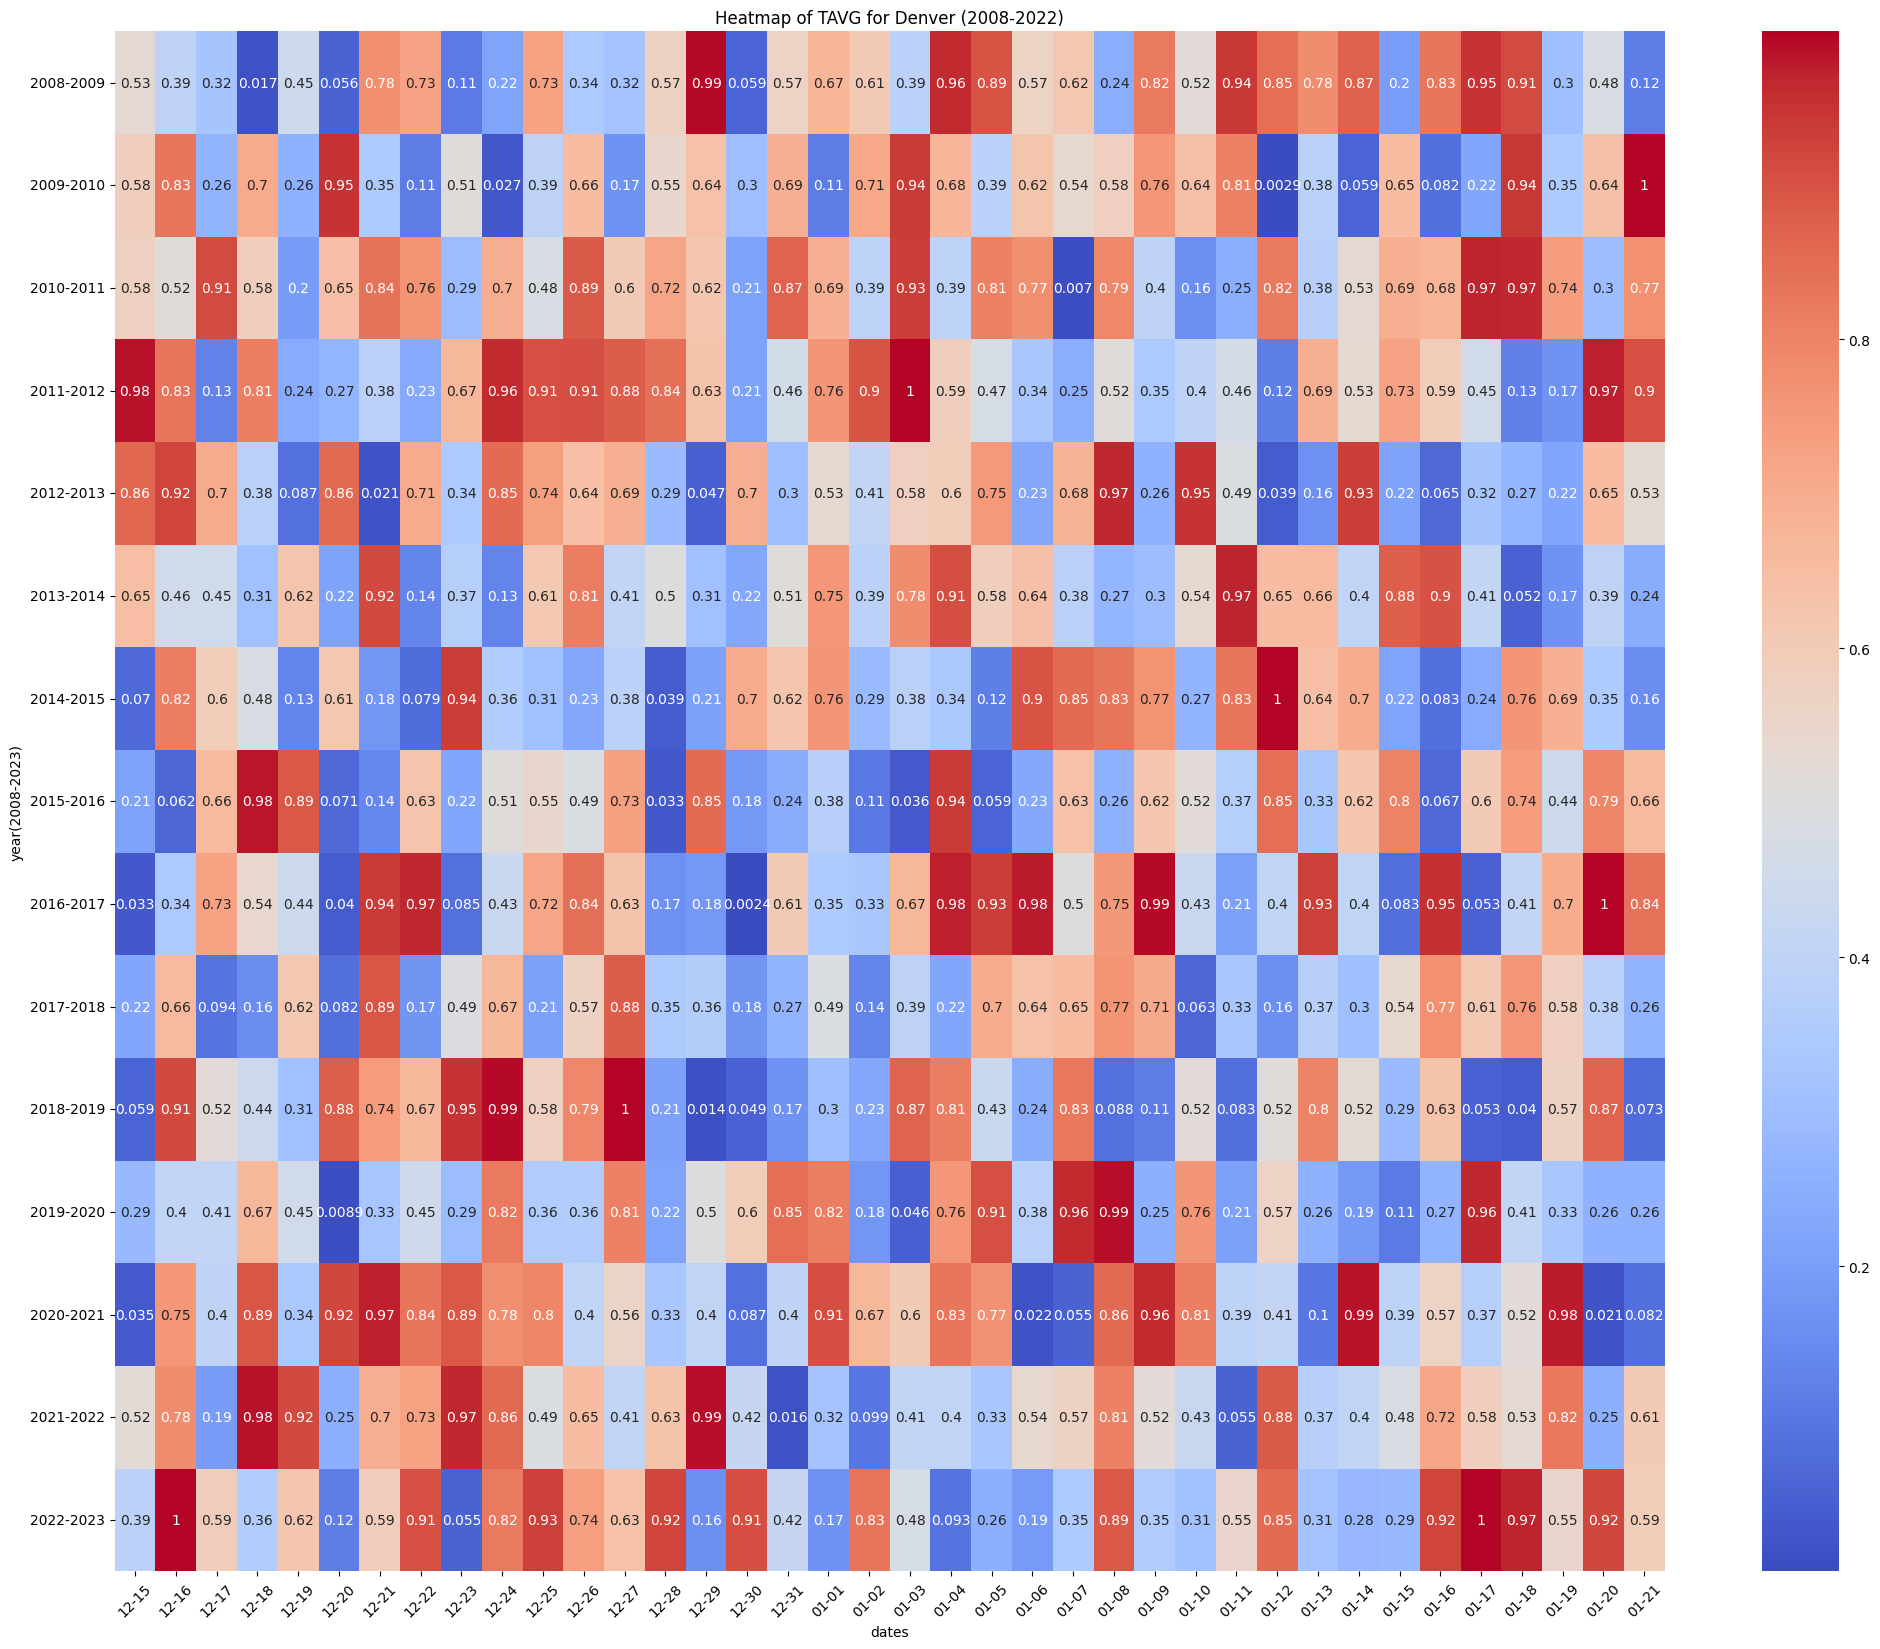

In [24]:

import pandas as pd
import numpy as np

dates = [f"{m:02d}-{d:02d}" for m in [12, 1] for d in range(1, 32) if not (m == 12 and d < 15) and not (m == 1 and d > 21)]
years = [f"{y}-{y+1}" for y in range(2008, 2023)]
data = np.random.rand(len(dates), len(years))  # Random data for demonstration
denver_data = pd.DataFrame(data, index=dates, columns=years)

denver_data_transposed = denver_data.transpose()


plt.figure(figsize=(25, 20))  
sns.heatmap(denver_data_transposed, cmap='coolwarm', annot=True)  # Use 'coolwarm' colormap


plt.xlabel('dates')  # Days are now on the x-axis
plt.ylabel('year(2008-2023)')  # Seasons are now on the y-axis
plt.title('Heatmap of TAVG for Denver (2008-2022)')


plt.xticks(rotation=45)  # Rotate the day labels for clarity
plt.yticks(rotation=0)  # Keep the year labels horizontal


plt.show()
